In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',80)

In [193]:
pd.read_csv('D:\PG_DSBA_Business_Analytics_\Data science Capstone\Project 1\\train.csv')

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,2.021834e+08,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1.560828e+06,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,6.956160e+07,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1.105793e+06,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2.554403e+06,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.

In [194]:
real_estate_df=pd.read_csv('D:\PG_DSBA_Business_Analytics_\Data science Capstone\Project 1\\train.csv')

# Performing EDA

In [195]:
real_estate_df.set_index('UID',inplace=True)

In [196]:
real_estate_df.index.nunique()

27161

In [197]:
## apply filter of percent ownership >10 % to original data and show data in geo-map 
filt=real_estate_df['pct_own']>0.1

In [198]:
pct_own_10=real_estate_df.loc[filt]

In [199]:
pct_own_10.shape

(26297, 79)

In [200]:
import plotly.express as px

In [201]:
fig = px.density_mapbox(pct_own_10, lat='lat', lon='lng', z='second_mortgage', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

<AxesSubplot:ylabel='Density'>

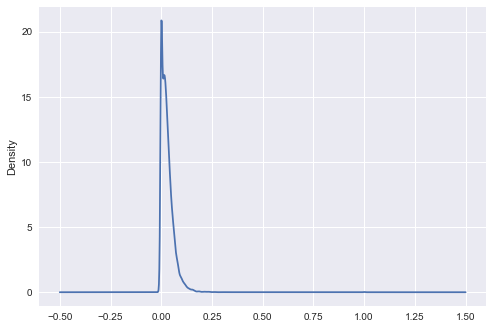

In [202]:
real_estate_df['second_mortgage'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

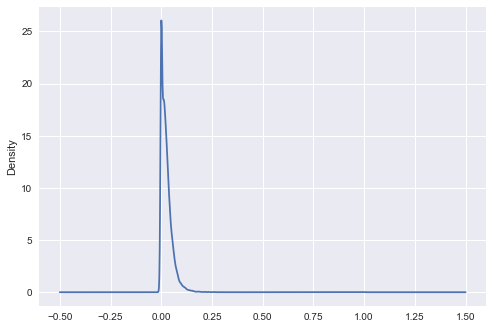

In [203]:
real_estate_df['home_equity_second_mortgage'].plot(kind='kde')

In [204]:
# Bad Debt = P (Second Mortgage ∩ Home Equity Loan) i.e P(A∩B)=n(A)+n(B)-n(AuB)
Bad_debt= real_estate_df['second_mortgage'] + real_estate_df['home_equity'] - real_estate_df['home_equity_second_mortgage']

In [205]:
debt=real_estate_df['debt']
real_estate_df.insert(1,'Bad_debt',Bad_debt)
real_estate_df.insert(2,'good_debt',debt-Bad_debt)

In [208]:
real_estate_df[list(('BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab',
       'city', 'place', 'type', 'primary', 'zip_code', 'area_code', 'lat',
       'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt','Bad_debt', 'good_debt','second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female',
       'male_age_mean', 'male_age_median', 'male_age_stdev',
       'male_age_sample_weight', 'male_age_samples', 'female_age_mean',
       'female_age_median', 'female_age_stdev', 'female_age_sample_weight',
       'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated',
       'divorced'))]

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,...,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,Bad_debt,good_debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,2.021834e+08,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,...,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.09408,0.43555,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1.560828e+06,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,...,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.04274,0.56581,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,6.956160e+07,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,...,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,0.09512,0.63972,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1.105793e+06,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,...,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.01086,0.51628,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2.554403e+06,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,...,39609.12605,244.08903,395.0,1

In [209]:
real_estate_df['Bad_debt'].sum()/real_estate_df['debt'].sum()* 100

16.70393320163593

In [210]:
## Study Debt related features

In [211]:
import matplotlib.pyplot as plt
%matplotlib inline

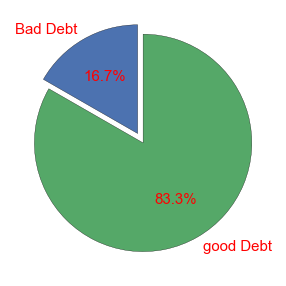

In [212]:
slices=[16.70393320163593,100-16.70393320163593]
labels=['Bad Debt','good Debt']
explode=[0.1,0]
plt.style.use('seaborn')
plt.figure(figsize=(16,5))
plt.pie(slices,labels=labels,startangle=90,explode=explode,autopct='%1.1f%%',
       wedgeprops={'edgecolor':'black'},textprops= {'color':'red','fontsize':15})
plt.show()

In [249]:
new_df=real_estate_df[['second_mortgage','home_equity', 'good_debt','Bad_debt']]

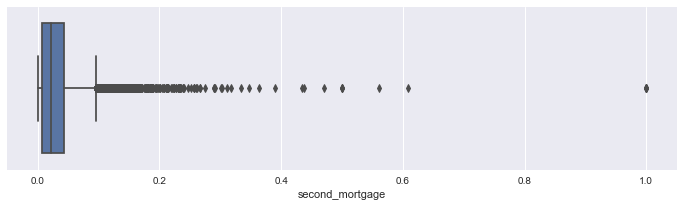

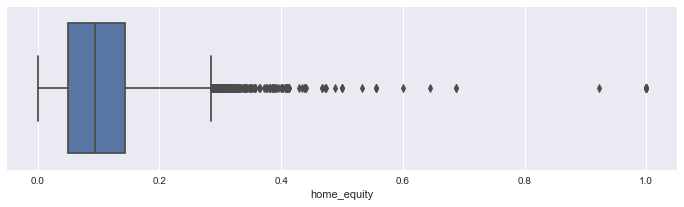

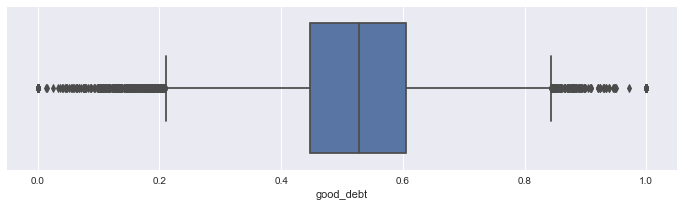

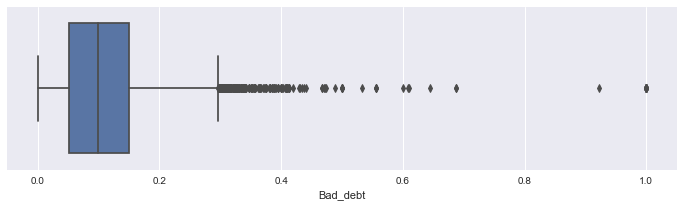

In [338]:
for col in new_df:
    plt.figure(figsize=(12,3))
    sns.boxplot(new_df[col])

In [253]:
income_df=real_estate_df[['hi_mean','family_mean']]

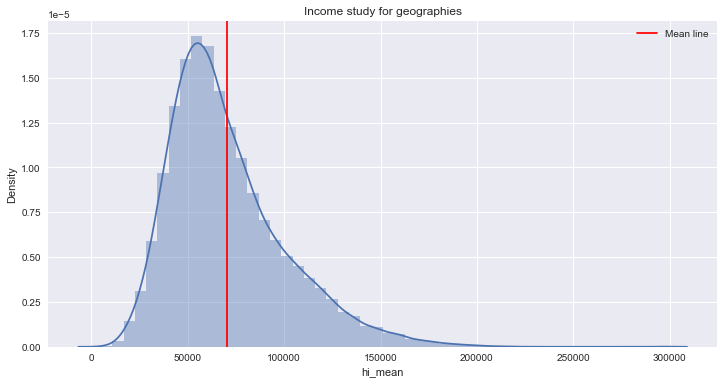

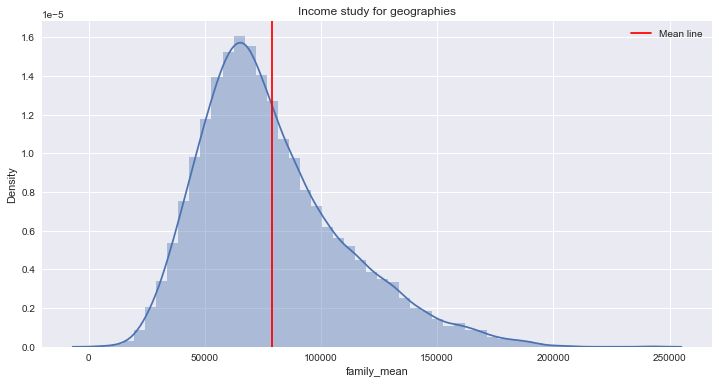

In [266]:
for col in income_df:
    plt.figure(figsize=(12,6))
    sns.distplot(income_df[col])
    plt.axvline(income_df[col].mean(),c='red',label='Mean line')
    plt.legend()
    plt.title('Income study for geographies')

In [ ]:
## Studying demographic data

In [269]:
demo_df=real_estate_df[['pop','ALand']]

In [270]:
demo_df['pop_density_perSQunit']=demo_df['pop']/demo_df['ALand']

In [271]:
demo_df.head()

,pop,ALand,pop_density_perSQunit
UID,,,
267822,5230,202183361.0,0.000026
246444,2633,1560828.0,0.001687
245683,6881,69561595.0,0.000099
279653,2700,1105793.0,0.002442
247218,5637,2554403.0,0.002207


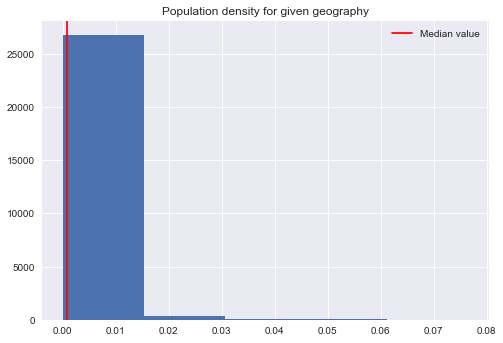

In [306]:
plt.hist(demo_df['pop_density_perSQunit'],bins=5,width=0.015307200000000002)
plt.axvline(demo_df.pop_density_perSQunit.median(),c='red',label='Median value')
plt.legend()
plt.title('Population density for given geography')
plt.show()

In [312]:
median_age=(real_estate_df.male_age_median*real_estate_df.male_pop+ real_estate_df.female_age_median*real_estate_df.female_pop)
            /(real_estate_df.male_pop + real_estate_df.female_pop)

In [314]:
real_estate_df['median_age_pop']=median_age;real_estate_df.head()

,BLOCKID,Bad_debt,good_debt,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,...,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,median_age_pop
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,NaN,0.09408,0.43555,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,...,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,44.667430
246444,NaN,0.04274,0.56581,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,...,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,34.722748
245683,NaN,0.09512,0.63972,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,...,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,41.774472
279653,NaN,0.01086,0.51628,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,...,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,49.879012
247218,NaN,0.05426,0.46512,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,...,50272.0,39609.12605,244.08903,395.0,1192.5

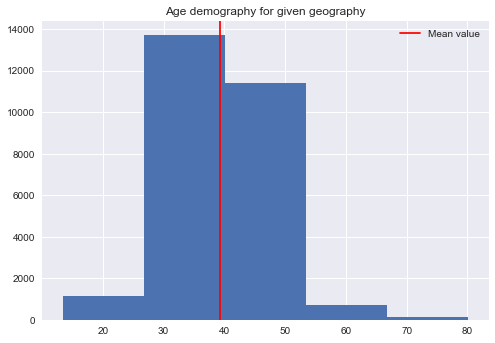

In [315]:
plt.hist(median_age,bins=5,)
plt.axvline(np.mean(median_age),c='red',label='Mean value')
plt.legend()
plt.title('Age demography for given geography')
plt.show()

In [316]:
np.mean(median_age)

39.212723365028744

In [ ]:
# most age group in real estate data is between 30-50 age group and mean age is 39 years

In [319]:
real_estate_df.groupby('state')[['rent_gt_10','rent_gt_15','rent_gt_20',
                                 'rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50']].mean()

,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50
state,,,,,,,,
Alabama,0.950191,0.843951,0.718932,0.606874,0.500401,0.416745,0.347653,0.257203
Alaska,0.936726,0.834884,0.679501,0.533500,0.423091,0.330604,0.269111,0.186501
Arizona,0.956740,0.868378,0.727003,0.596024,0.480607,0.396187,0.331061,0.239507
Arkansas,0.953508,0.849838,0.707608,0.591078,0.479326,0.393318,0.324816,0.236328
California,0.970568,0.906607,0.799542,0.677422,0.562465,0.466658,0.393015,0.289715
Colorado,0.961001,0.878195,0.737607,0.607517,0.482944,0.381943,0.319857,0.232592
Connecticut,0.959823,0.874011,0.742618,0.619278,0.498312,0.409470,0.345732,0.253320
Delaware,0.952510,0.870289,0.712455,0.592785,0.495594,0.410599,0.347674,0.240782
District of Columbia,0.947617,0.851978,0.736673,0.605925,0.487203,0.401574,0.338679,0.263477


In [320]:
ren_inc_compare=real_estate_df.groupby('state')[['rent_gt_10','rent_gt_15','rent_gt_20',
                                 'rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50']].mean()

In [321]:
ren_inc_compare.describe()

,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.951793,0.854791,0.721674,0.593181,0.480025,0.391907,0.327933,0.240378
std,0.018431,0.035418,0.045659,0.050568,0.048764,0.044893,0.040171,0.033102
min,0.867737,0.708742,0.566287,0.435684,0.333070,0.261272,0.219632,0.158772
25%,0.945873,0.842931,0.705016,0.574764,0.459967,0.369784,0.310175,0.226468
50%,0.956341,0.861028,0.729261,0.603967,0.486138,0.397092,0.328449,0.241435
75%,0.962705,0.875054,0.746928,0.620946,0.505493,0.417067,0.347658,0.259643
max,0.974392,0.906607,0.807883,0.688373,0.579208,0.479896,0.411015,0.318503


In [ ]:
# States Like Hawaii & Puerto Rico have high values of rent to income ratios
# State of North Dakota has least ratio of rent to income.

In [ ]:
### Correlation analysis

In [330]:
real_estate_df.select_dtypes(exclude='object')

,BLOCKID,Bad_debt,good_debt,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,median_age_pop
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,NaN,0.09408,0.43555,140,53,36,13346,315,42.840812,-75.501524,2.021834e+08,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,44.667430
246444,NaN,0.04274,0.56581,140,141,18,46616,574,41.701441,-86.266614,1.560828e+06,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,34.722748
245683,NaN,0.09512,0.63972,140,63,18,46122,317,39.792202,-86.515246,6.956160e+07,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,41.774472
279653,NaN,0.01086,0.51628,140,127,72,927,787,18.396103,-66.104169,1.105793e+06,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,49.879012
247218,NaN,0.05426,0.46512,140,161,20,66502,785,39.195573,-96.569366,2.554403e+06,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.74967,1.00000,1.00000,1.0

In [331]:
real_estate_df.drop(['BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab',
       'city', 'place', 'type', 'primary', 'zip_code', 'area_code', 'lat',
       'lng',],1,inplace=True)

In [332]:
real_estate_df.corr()

,Bad_debt,good_debt,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,median_age_pop
Bad_debt,1.000000,0.095577,-0.079661,-0.024154,0.101638,0.094264,0.105231,0.417984,0.395929,0.311356,-0.158226,-0.003071,0.076322,0.068766,0.016018,-0.025486,-0.054359,-0.065757,-0.069185,-0.070290,-0.024053,0.001281,0.471459,0.462732,0.418368,-0.138821,0.108054,0.459303,0.445730,0.390519,-0.142556,0.131955,0.474929,0.464682,0.383458,-0.012664,0.285146,0.380775,0.364519,0.232126,-0.177446,-0.285272,0.510743,0.562695,0.985536,0.538502,-0.509581,-0.921826,-0.537530,0.351926,0.352007,0.328224,0.020993,0.067874,-0.029421,0.064177,0.094167,0.008184,0.046974,-0.054942,0.079276,0.105032,0.138195,0.189346,-0.158095,-0.154751,-0.215277,0.060263
good_debt,0.095577,1.000000,-0.093563,-0.035403,0.223856,0.207277,0.232112,0.291654,0.288848,0.153845,-0.009802,0.146971,0.140449,0.138368,0.078382,0.032945,0.004129,-0.012537,-0.022229,-0.031784,0.123305,0.150484,0.243715,0.258522,0.161371,0.010953,0.167229,0.202985,0.198962,0.148569,0.059746,0.198308,0.213658,0.217976,0.067224,0.172147,0.322254,0.162176,0.159828,0.029586,-0.342101,-0.368951,0.114486,0.110822,0.095788,0.890235,-0.198093,-0.170176,-0.850516,0.144882,0.154367,0.123678,-0.315520,-0.265659,-0.224226,0.155881,0.207603,-0.321126,-0.287018,-0.216133,0.196882,0.231680,-0.033109,0.030195,-0.026642,-0.059577,-0.152268,-0.289166
ALand,-0.079661,-0.093563,1.000000,0.413428,-0.033743,-0.023061,-0.043092,-0.067193,-0.065531,-0.033500,-0.046061,-0.066676,-0.097550,-0.096517,-0.084420,-0.076445,-0.062082,-0.056130,-0.049589,-0.049424,-0.057497,-0.065206,-0.028444,-0.029751,-0.018238,-0.027794,-0.041301,-0.027905,-0.029362,-0.017822,-0.012265,-0.027547,-0.056368,-0.057985,-0.015411,-0.010126,-0.037900,-0.056755,-0.058171,-0.006309,0.051876,0.067846,-0.041710,-0.043677,-0.079537,-0.115653,0.047109,0.087228,0.106371,-0.002293,-0.006070,0.003327,0.043615,0.050700,0.033727,-0.021605,-0.023827,0.017414,0.030912,0.026687,-0.043346,-0.044368,0.050611,0.028296,0.003448,-0.005905,0.023388,0.041656
AWater,-0.024154,-0.035403,0.413428,1.000000,-0.016493,-0.013331,-0.018978,-0.009550,-0.009362,0.002498,-0.016999,-0.020048,-0.029189,-0.028573,-0.032877,-0.028763,-0.023937,-0.023331,-0.019501,-0.017961,-0.018743,-0.020207,-0.002167,-0.002154,0.000892,-0.018107,-0.019079,-0.002059,-0.002437,0.001788,-0.014055,-0.015328,-0.009939,-0.010924,0.005107,-0.014636,-0.016954,-0.010591,-0.010927,0.004779,0.008950,0.010876,-0.014546,-0.014576,-0.024319,-0.041022,0.015958,0.025724,0.035362,0.006227,0.005996,0.005927,0.007821,0.010588,-0.001380,-0.011565,-0.013081,-0.005418,-0.001131,-0.005830,-0.018738,-0.018851,0.010338,-0.000563,0.005076,-0.001209,0.007680,0.004922
pop,0.101638,0.223856,-0.033743,-0.016493,1.000000,0.978774,0.978263,0.163614,0.157647,0.119101,0.249920,0.420232,0.064385,0.061085,0.023293,0.001296,-0.009495,-0.017488,-0.024907,-0.042084,0.446334,0.435093,0.169728,0.175933,0.128737,0.714284,0.895026,0.130474,0.126503,0.108863,0.792663,0.931580,0.115821,0.111475,0.086066,0.654489,0.785228,0.052771,0.051779,0.052668,0.453100,0.382260,0.081224,0.081396,0.101498,0.236003,-0.149137,-0.127915,-0.247336,0.049925,0

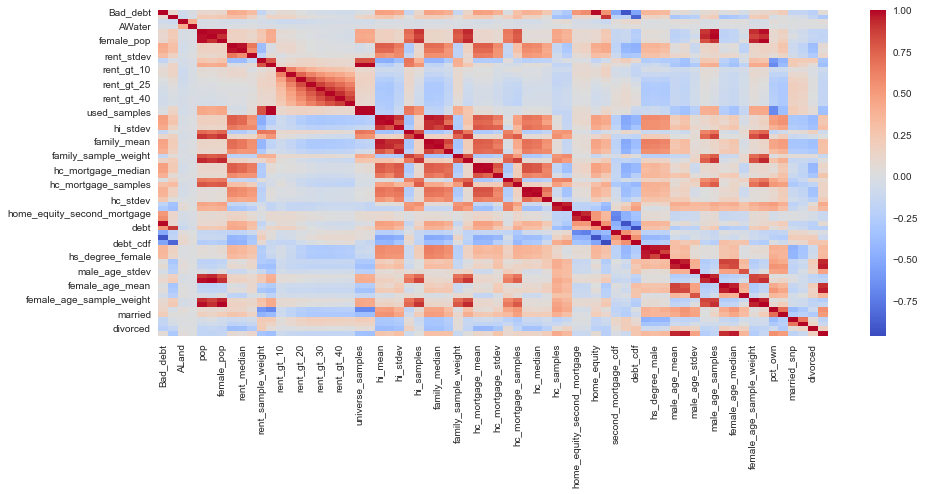

In [336]:
plt.figure(figsize=(15,6))
sns.heatmap(real_estate_df.corr(),cmap='coolwarm')
plt.show()

In [ ]:
# bad debt and home equity have very high positive correlation
# bad debt and home equity cdf have very high neg correlation
# household and family income have high positive correlation